# **T3 - Convolutional Neural Networks (CVN-convnets)**


Elaborado por GRUPO 1:

* Juanita Piraban Barbosa - 201216313
* Lorena Morales Rodríguez - 202027957
* Alejandro Barinas Guio - 201628859
* Jaime Humberto Trujillo Perea - 201920366
* Alexander Zapata Galindo - 201425426

**INSTRUCCIONES**

* Descargar la base de datos fashion_mnist de Keras
* Encontrar los hiperparámetros que determinan el modelo con acurracy más alto. Si el uso de grillas resulta computacionalmente costoso, por favor, validar sus resultados con el promedio de 10 corridas del modelo.
* Presentar el archivo .ipynb con la grilla de optimización o con las 10 corridas.

**DESARROLLO**

En primer lugar, se obtienen los datos y se preparan los mismos:

In [72]:
# Librerías
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from keras import backend as K

from keras import models
from keras import layers

!pip install livelossplot
from livelossplot import PlotLossesKeras

In [2]:
# Base de datos: FASHION MNIST
from keras.datasets import fashion_mnist
(X_train_image, y_train_labels), (X_test_image, y_test_labels) = fashion_mnist.load_data()

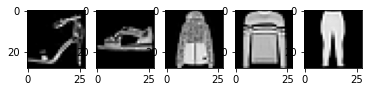

In [3]:
# Ejemplos de imágenes incluidas en la base de datos
plt.subplot(151)
plt.imshow(X_train_image[8], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train_image[13], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train_image[22], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train_image[5], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train_image[80], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Transformación
X_train_image = X_train_image.reshape((60000, 28, 28, 1))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((10000, 28, 28, 1))
X_test_image = X_test_image.astype('float32') / 255

# Categorizar datos 
from tensorflow.keras.utils import to_categorical
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

Posteriormente, se realizaron 10 corridas, cuyos resultados se muestran a continuación:

**MODELO 1**



In [73]:
# Hiperparámetros
conv_1=32                   # Número de filtros en la primera convolución
conv_2=64                   # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=32               # Número de neuronas en la capa oculta
batch_size_opt=128          # Tamaño del lote
epochs_opt= 10              # Número de épocas
optimizer_opt='rmsprop'     # Optimizador

In [74]:
# Modelo
K.clear_session()
model_1 = models.Sequential()
model_1.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(neuron_opt, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

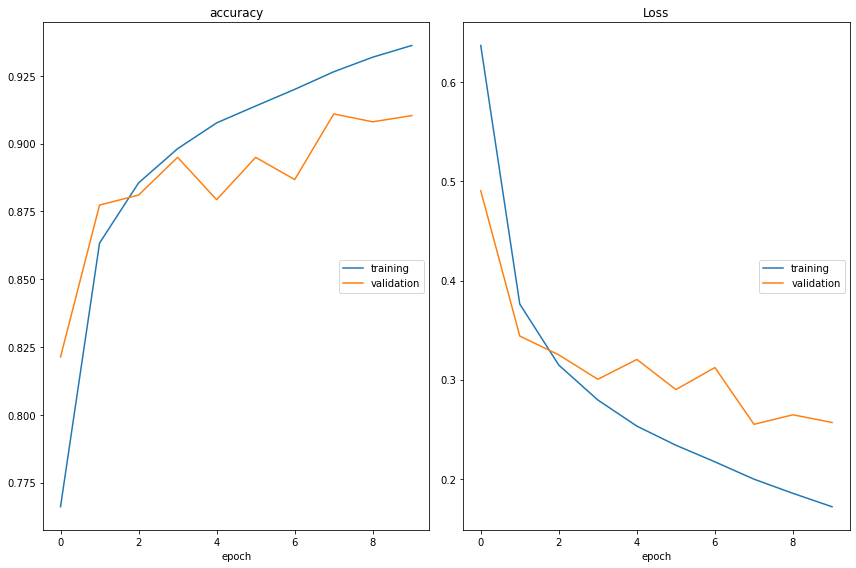

accuracy
	training         	 (min:    0.766, max:    0.936, cur:    0.936)
	validation       	 (min:    0.821, max:    0.911, cur:    0.910)
Loss
	training         	 (min:    0.172, max:    0.637, cur:    0.172)
	validation       	 (min:    0.255, max:    0.491, cur:    0.257)


In [75]:
# Compilación
model_1.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_1.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [76]:
# Evaluación 
test_loss_1, test_acc_1 = model_1.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2568 - accuracy: 0.9103


**MODELO 2**

In [127]:
# Hiperparámetros
conv_1=32                # Número de filtros en la primera convolución
conv_2=32                # Número de filtros en la segunda convolución
conv_3=32                # Número de filtros en la tercera convolución
neuron_opt=64            # Número de neuronas en la capa oculta
batch_size_opt=128        # Tamaño del lote
epochs_opt= 20           # Número de épocas
optimizer_opt='rmsprop'     # Optimizador

In [128]:
# Modelo
K.clear_session()
model_2 = models.Sequential()
model_2.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(neuron_opt, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
print(model_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

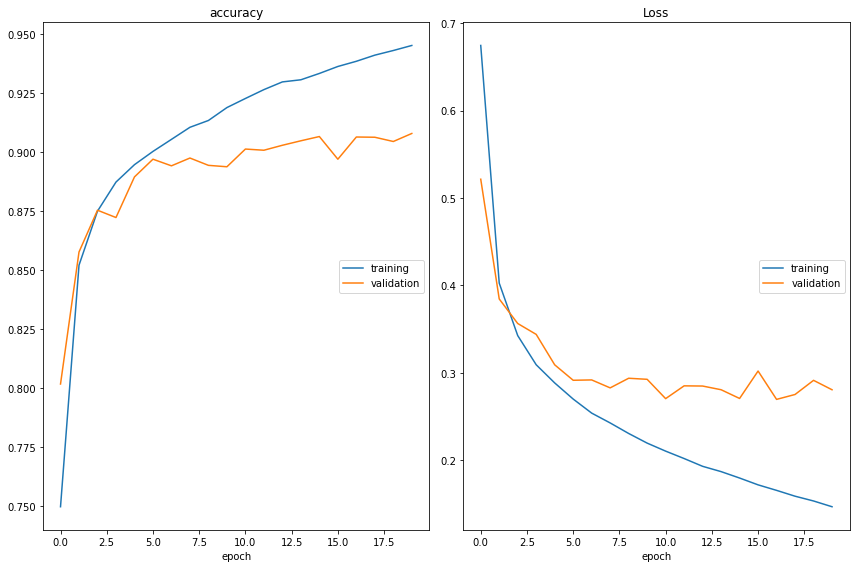

accuracy
	training         	 (min:    0.750, max:    0.945, cur:    0.945)
	validation       	 (min:    0.802, max:    0.908, cur:    0.908)
Loss
	training         	 (min:    0.147, max:    0.675, cur:    0.147)
	validation       	 (min:    0.270, max:    0.522, cur:    0.281)


In [129]:
# Compilación
model_2.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_2.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [130]:
# Evaluación 
test_loss_2, test_acc_2 = model_2.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2806 - accuracy: 0.9078


**MODELO 3**

In [55]:
# Hiperparámetros
conv_1=32                   # Número de filtros en la primera convolución
conv_2=64                   # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=64               # Número de neuronas en la capa oculta
batch_size_opt= 64          # Tamaño del lote
epochs_opt= 10              # Número de épocas
optimizer_opt='adam'        # Optimizador

In [56]:
# Modelo
K.clear_session()
model_3 = models.Sequential()
model_3.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(neuron_opt, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
print(model_3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

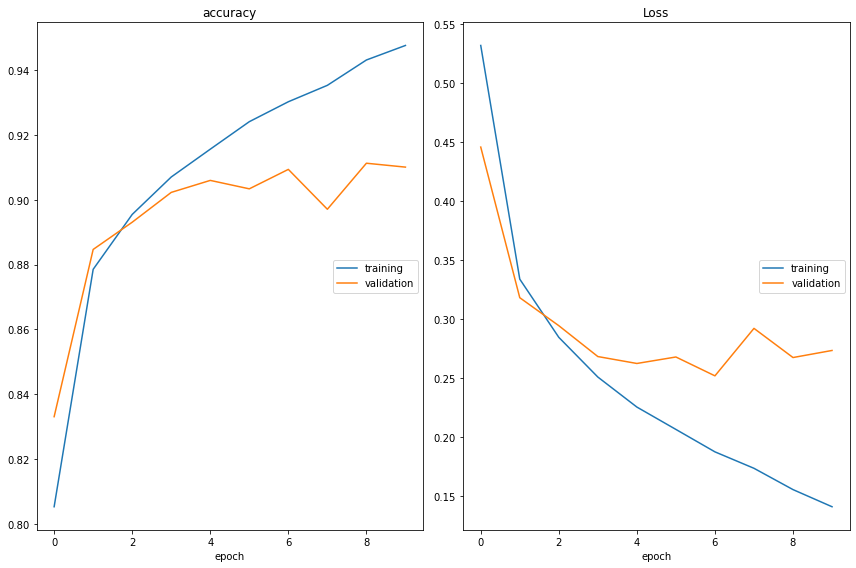

accuracy
	training         	 (min:    0.805, max:    0.948, cur:    0.948)
	validation       	 (min:    0.833, max:    0.911, cur:    0.910)
Loss
	training         	 (min:    0.141, max:    0.532, cur:    0.141)
	validation       	 (min:    0.252, max:    0.446, cur:    0.274)


In [57]:
# Compilación
model_3.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_3.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [58]:
# Evaluación 
test_loss_3, test_acc_3 = model_3.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2736 - accuracy: 0.9101


**MODELO 4**

In [59]:
# Hiperparámetros
conv_1=32                   # Número de filtros en la primera convolución
conv_2=64                   # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=128              # Número de neuronas en la capa oculta
batch_size_opt= 128         # Tamaño del lote
epochs_opt= 20              # Número de épocas
optimizer_opt='adam'        # Optimizador

In [60]:
# Modelo
K.clear_session()
model_4 = models.Sequential()
model_4.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(neuron_opt, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))
print(model_4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

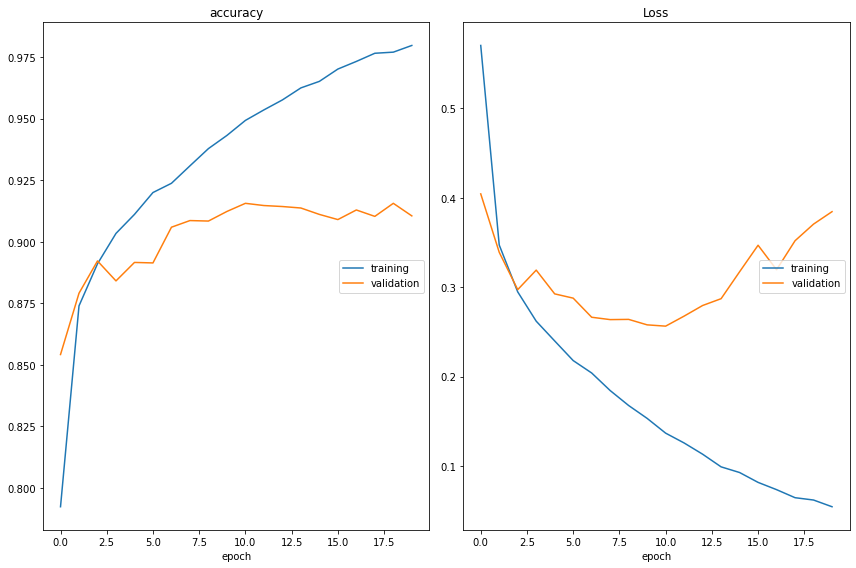

accuracy
	training         	 (min:    0.792, max:    0.980, cur:    0.980)
	validation       	 (min:    0.854, max:    0.916, cur:    0.910)
Loss
	training         	 (min:    0.054, max:    0.570, cur:    0.054)
	validation       	 (min:    0.256, max:    0.404, cur:    0.384)


In [61]:
# Compilación
model_4.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_4.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [62]:
# Evaluación 
test_loss_4, test_acc_4 = model_4.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3845 - accuracy: 0.9105


**MODELO 5**

In [21]:
# Hiperparámetros
conv_1=128                  # Número de filtros en la primera convolución
conv_2=128                  # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=128              # Número de neuronas en la capa oculta
batch_size_opt= 128         # Tamaño del lote
epochs_opt= 10              # Número de épocas
optimizer_opt='rmsprop'     # Optimizador
dropout_opt=0.25            # Parámetro de dilución(abandono)

In [22]:
# Modelo
K.clear_session()
model_5 = models.Sequential()
model_5.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_5.add(layers.Flatten())
model_5.add(layers.Dense(neuron_opt, activation='relu'))
model_5.add(Dropout(dropout_opt)) 
model_5.add(layers.Dense(10, activation='softmax'))
print(model_5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

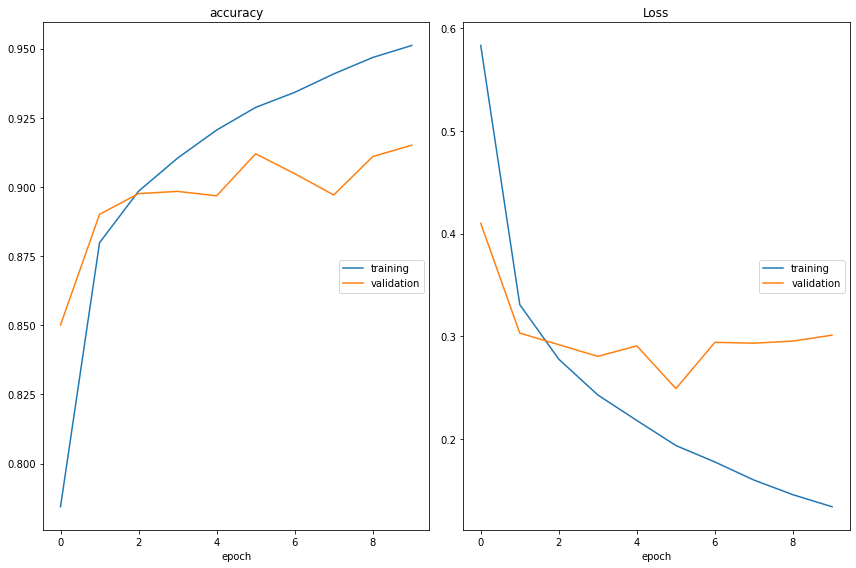

accuracy
	training         	 (min:    0.784, max:    0.951, cur:    0.951)
	validation       	 (min:    0.850, max:    0.915, cur:    0.915)
Loss
	training         	 (min:    0.134, max:    0.583, cur:    0.134)
	validation       	 (min:    0.249, max:    0.410, cur:    0.301)


In [23]:
# Compilación
model_5.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_5.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [24]:
# Evaluación 
test_loss_5, test_acc_5 = model_5.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 6s 20ms/step - loss: 0.3012 - accuracy: 0.9151


**MODELO 6**

In [25]:
# Hiperparámetros
conv_1=32                   # Número de filtros en la primera convolución
conv_2=64                   # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=128              # Número de neuronas en la capa oculta
batch_size_opt= 128         # Tamaño del lote
epochs_opt= 20              # Número de épocas
optimizer_opt='rmsprop'     # Optimizador
dropout_opt=0.25            # Parámetro de dilución(abandono)

In [26]:
# Modelo
K.clear_session()
model_6 = models.Sequential()
model_6.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_6.add(Dropout(dropout_opt)) 
model_6.add(layers.Flatten())
model_6.add(layers.Dense(neuron_opt, activation='relu'))
model_6.add(layers.Dense(10, activation='softmax'))
print(model_6.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

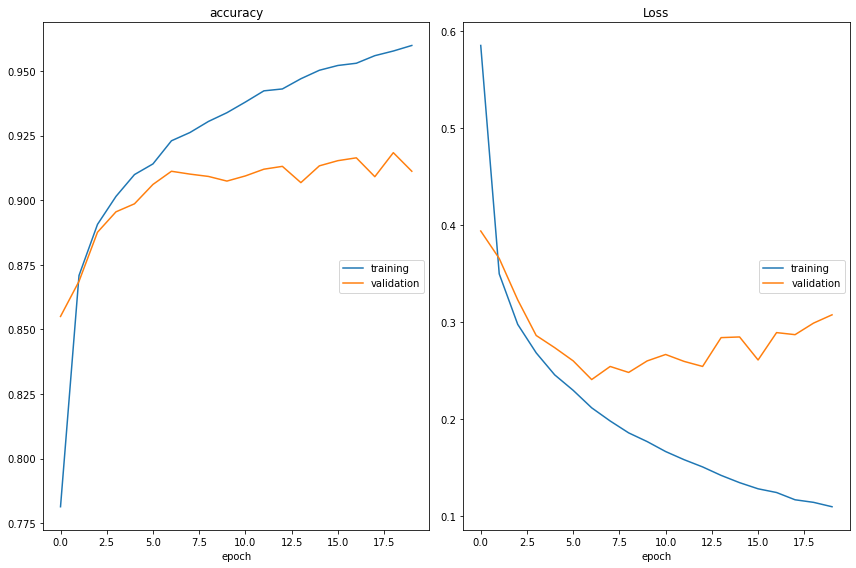

accuracy
	training         	 (min:    0.781, max:    0.960, cur:    0.960)
	validation       	 (min:    0.855, max:    0.918, cur:    0.911)
Loss
	training         	 (min:    0.110, max:    0.585, cur:    0.110)
	validation       	 (min:    0.241, max:    0.394, cur:    0.308)


In [27]:
# Compilación
model_6.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_6.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [28]:
# Evaluación 
test_loss_6, test_acc_6 = model_6.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3077 - accuracy: 0.9112


**MODELO 7**

In [29]:
# Hiperparámetros
conv_1=32                   # Número de filtros en la primera convolución
conv_2=64                   # Número de filtros en la segunda convolución
conv_3=128                  # Número de filtros en la tercera convolución
neuron_opt=128              # Número de neuronas en la capa oculta
batch_size_opt= 128         # Tamaño del lote
epochs_opt= 50              # Número de épocas
optimizer_opt='adam'        # Optimizador
dropout_1_opt = 0.25        # Parámetro de dilución(abandono) primera convolución
dropout_2_opt = 0.25        # Parámetro de dilución(abandono) segunda convolución
dropout_3_opt = 0.40        # Parámetro de dilución(abandono) tercera convolución
dropout_4_opt = 0.30        # Parámetro de dilución(abandono) capa oculta

In [30]:
# Modelo
K.clear_session()
model_7 = models.Sequential()
model_7.add(layers.Conv2D(conv_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(Dropout(dropout_1_opt))
model_7.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(Dropout(dropout_2_opt)) 
model_7.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_7.add(Dropout(dropout_3_opt))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(neuron_opt, activation='relu'))
model_7.add(Dropout(dropout_4_opt)) 
model_7.add(layers.Dense(10, activation='softmax'))
print(model_7.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

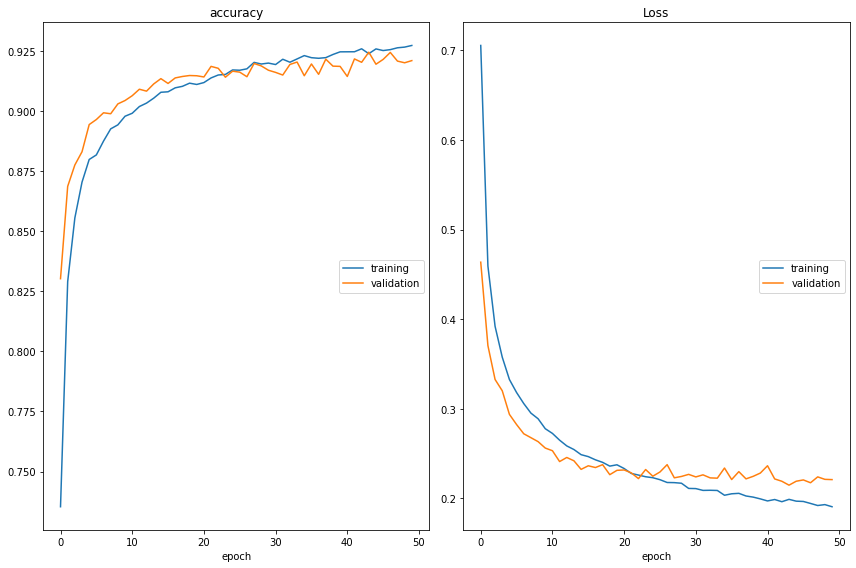

accuracy
	training         	 (min:    0.735, max:    0.927, cur:    0.927)
	validation       	 (min:    0.830, max:    0.924, cur:    0.921)
Loss
	training         	 (min:    0.191, max:    0.706, cur:    0.191)
	validation       	 (min:    0.215, max:    0.464, cur:    0.221)


In [31]:
# Compilación
model_7.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_7.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [32]:
# Evaluación 
test_loss_7, test_acc_7 = model_7.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2211 - accuracy: 0.9209


**MODELO 8**

In [33]:
# Hiperparámetros
conv_1=32                      # Número de filtros en la primera convolución
conv_2=64                      # Número de filtros en la segunda convolución
conv_3=128                     # Número de filtros en la tercera convolución
neuron_opt=128                 # Número de neuronas en la capa oculta
batch_size_opt= 128            # Tamaño del lote
epochs_opt= 50                 # Número de épocas
optimizer_opt='adam'           # Optimizador
dropout_1_opt = 0.25           # Parámetro de dilución(abandono) primera convolución
dropout_2_opt = 0.25           # Parámetro de dilución(abandono) segunda convolución
dropout_3_opt = 0.40           # Parámetro de dilución(abandono) tercera convolución
dropout_4_opt = 0.30           # Parámetro de dilución(abandono) capa oculta
initial_kernel = 'he_normal'   # Inicializador del kernel

In [34]:
# Modelo
K.clear_session()
model_8 = models.Sequential()
model_8.add(layers.Conv2D(conv_1, (3,3), activation='relu', kernel_initializer=initial_kernel, input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(Dropout(dropout_1_opt)) 
model_8.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(Dropout(dropout_2_opt)) 
model_8.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_8.add(Dropout(dropout_3_opt)) 
model_8.add(layers.Flatten())
model_8.add(layers.Dense(neuron_opt, activation='relu'))
model_8.add(Dropout(dropout_4_opt)) 
model_8.add(layers.Dense(10, activation='softmax'))
print(model_8.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

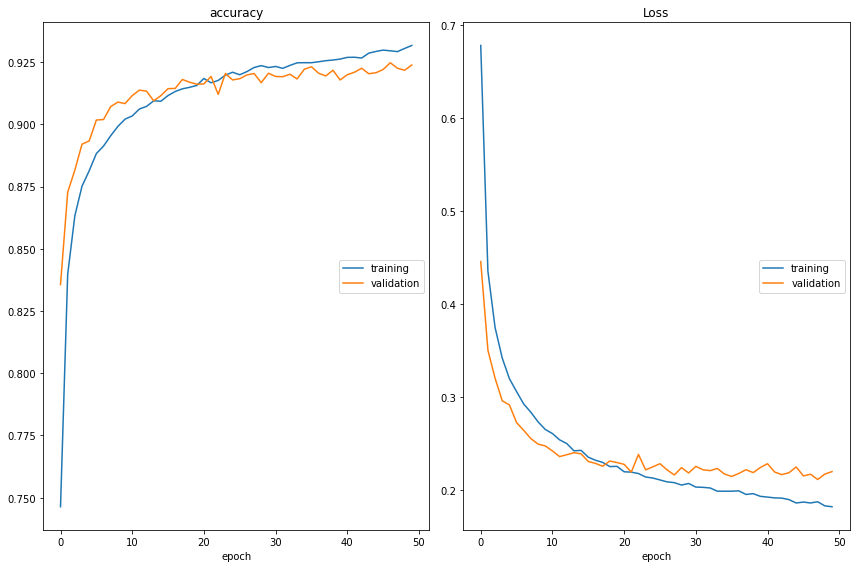

accuracy
	training         	 (min:    0.746, max:    0.932, cur:    0.932)
	validation       	 (min:    0.836, max:    0.925, cur:    0.924)
Loss
	training         	 (min:    0.182, max:    0.678, cur:    0.182)
	validation       	 (min:    0.212, max:    0.446, cur:    0.220)


In [35]:
# Compilación
model_8.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_8.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [36]:
# Evaluación 
test_loss_8, test_acc_8 = model_8.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2202 - accuracy: 0.9238


**MODELO 9**

In [118]:
# Hiperparámetros
conv_1=32                      # Número de filtros en la primera convolución
conv_2=64                      # Número de filtros en la segunda convolución
conv_3=128                     # Número de filtros en la tercera convolución
neuron_opt=128                 # Número de neuronas en la capa oculta
batch_size_opt= 128            # Tamaño del lote
epochs_opt= 50                 # Número de épocas
optimizer_opt='adam'           # Optimizador
dropout_1_opt = 0.30           # Parámetro de dilución(abandono) primera convolución
dropout_2_opt = 0.30           # Parámetro de dilución(abandono) segunda convolución
dropout_3_opt = 0.30           # Parámetro de dilución(abandono) tercera convolución
dropout_4_opt = 0.25           # Parámetro de dilución(abandono) capa oculta
initial_kernel = 'he_normal'   # Inicializador del kernel

In [119]:
# Modelo
K.clear_session()
model_9 = models.Sequential()
model_9.add(layers.Conv2D(conv_1, (3,3), activation='relu', kernel_initializer=initial_kernel, input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(Dropout(dropout_1_opt)) 
model_9.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(Dropout(dropout_2_opt))
model_9.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_9.add(Dropout(dropout_3_opt))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(neuron_opt, activation='relu'))
model_9.add(Dropout(dropout_4_opt))
model_9.add(layers.Dense(10, activation='softmax'))
print(model_9.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

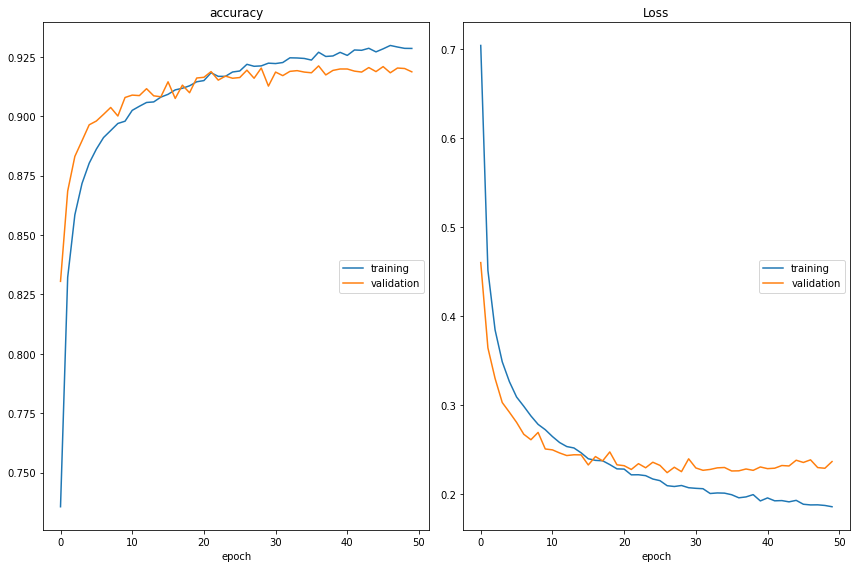

accuracy
	training         	 (min:    0.736, max:    0.930, cur:    0.929)
	validation       	 (min:    0.831, max:    0.921, cur:    0.919)
Loss
	training         	 (min:    0.186, max:    0.704, cur:    0.186)
	validation       	 (min:    0.224, max:    0.460, cur:    0.236)


In [120]:
# Compilación
model_9.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_9.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [121]:
# Evaluación 
test_loss_9, test_acc_9 = model_9.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2364 - accuracy: 0.9187


**MODELO 10**

In [41]:
# Hiperparámetros
conv_1=32                      # Número de filtros en la primera convolución
conv_2=64                      # Número de filtros en la segunda convolución
conv_3=128                     # Número de filtros en la tercera convolución
neuron_opt=128                 # Número de neuronas en la capa oculta
batch_size_opt= 128            # Tamaño del lote
epochs_opt= 50                 # Número de épocas
optimizer_opt='adam'           # Optimizador
dropout_1_opt = 0.25           # Parámetro de dilución(abandono) primera convolución
dropout_2_opt = 0.30           # Parámetro de dilución(abandono) segunda convolución
dropout_3_opt = 0.25           # Parámetro de dilución(abandono) tercera convolución
dropout_4_opt = 0.40           # Parámetro de dilución(abandono) capa oculta
initial_kernel = 'he_uniform'  # Inicializador del kernel

In [42]:
# Modelo
K.clear_session()
model_10 = models.Sequential()
model_10.add(layers.Conv2D(conv_1, (3,3), activation='relu', kernel_initializer=initial_kernel, input_shape=(28, 28, 1)))
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(Dropout(dropout_1_opt)) 
model_10.add(layers.Conv2D(conv_2, (3,3), activation='relu'))
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(Dropout(dropout_2_opt))
model_10.add(layers.Conv2D(conv_3, (3,3), activation='relu'))
model_10.add(Dropout(dropout_3_opt))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(neuron_opt, activation='relu'))
model_10.add(Dropout(dropout_4_opt))
model_10.add(layers.Dense(10, activation='softmax'))
print(model_10.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

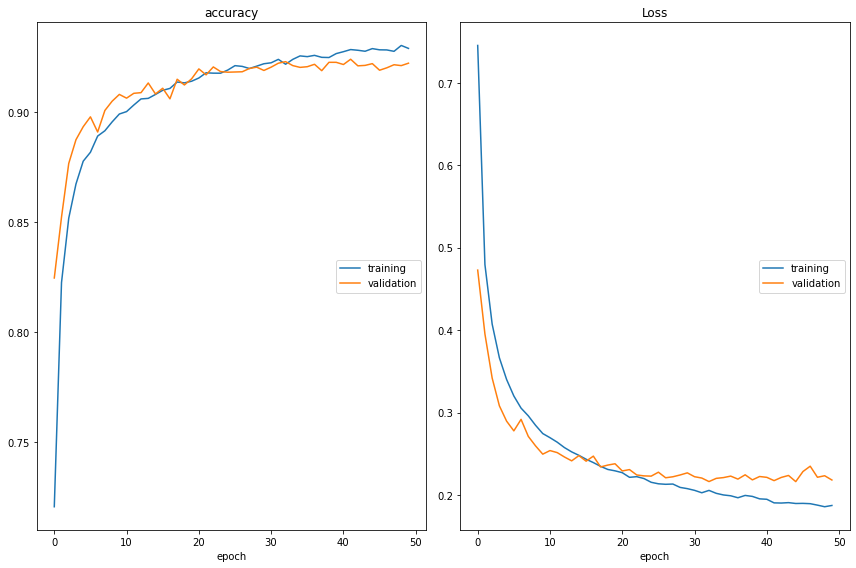

accuracy
	training         	 (min:    0.721, max:    0.930, cur:    0.929)
	validation       	 (min:    0.825, max:    0.924, cur:    0.922)
Loss
	training         	 (min:    0.186, max:    0.745, cur:    0.187)
	validation       	 (min:    0.216, max:    0.473, cur:    0.218)


In [43]:
# Compilación
model_10.compile(optimizer=optimizer_opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_10.fit(X_train_image, y_train_labels, epochs=epochs_opt, batch_size=batch_size_opt,validation_data=(X_test_image, y_test_labels),
                  verbose=1, callbacks=[PlotLossesKeras()])

In [44]:
# Evaluación 
test_loss_10, test_acc_10 = model_10.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2182 - accuracy: 0.9223


#### RESUMEN

In [131]:
# Resumen desempeño de los modelos
print('Resumen "accuracy"')
print('modelo 1: ' + str(round(test_acc_1,4)))
print('modelo 2: ' + str(round(test_acc_2,4)))
print('modelo 3: ' + str(round(test_acc_3,4)))
print('modelo 4: ' + str(round(test_acc_4,4)))
print('modelo 5: ' + str(round(test_acc_5,4)))
print('modelo 6: ' + str(round(test_acc_6,4)))
print('modelo 7: ' + str(round(test_acc_7,4)))
print('modelo 8: ' + str(round(test_acc_8,4)))
print('modelo 9: ' + str(round(test_acc_9,4)))
print('modelo 10: ' + str(round(test_acc_10,4)))
promedio = (test_acc_1+test_acc_2+test_acc_3+test_acc_4+test_acc_5+test_acc_6+test_acc_7+test_acc_8+test_acc_9+test_acc_10)/10
print('Promedio: ' + str(round(promedio,4)))

Resumen "accuracy"
modelo 1: 0.9103
modelo 2: 0.9078
modelo 3: 0.9101
modelo 4: 0.9105
modelo 5: 0.9151
modelo 6: 0.9112
modelo 7: 0.9209
modelo 8: 0.9238
modelo 9: 0.9187
modelo 10: 0.9223
Promedio: 0.9151


**COMENTARIOS:**

Se estimaron 10 modelos diferentes con combinaciones de algunos hiperparámetros.

Los hiperparámetros que se probaron, con sus respectivos valores, fueron: 
* Optimizador: 'Adam' y 'RMSprop'.
* Épocas: 10, 20 y 50.
* Neuronas en la capa oculta: 64 y 128.
* Tamaño del lote: 64 y 128.
* Parámetro "dropout": 0.25, 0.30 y 0.40.
* Número de filtros en las convoluciones: 32, 64 y 128.
* Inicializador del "kernel": 'he_normal', 'ones' y 'he_uniform'.

Luego de correr los modelos, en promedio el "accuracy" obtenido fue de 91.51%, con un mínimo de 90.78% y un máximo de 92.38%.

Finalmente, se encontró que los hiperparámetros que más afectaron el "accuracy" fueron: el optimizador, el inicializador del "kernel" y el parámetro "dropout".
